**Table of contents**<a id='toc0_'></a>    
- [Projekat 2 - nenadgledano učenje](#toc1_)    
  - [Učitavanje _dataset_-a](#toc1_1_)    
  - [Deskriptivna analiza](#toc1_2_)    
  - [Preprocesiranje podataka](#toc1_3_)    
    - [Izbacivanje duplikata](#toc1_3_1_)    
    - [Enkodiranje kategoričkih vrednosti](#toc1_3_2_)    
    - [Izbacivanje nepotrebnih kolona](#toc1_3_3_)    
  - [Klasterizacija](#toc1_4_)    
    - [Skaliranje podataka](#toc1_4_1_)    
      - [_StandardScaler_](#toc1_4_1_1_)    
      - [_MinMaxScaler_](#toc1_4_1_2_)    
      - [_RobustScaler_](#toc1_4_1_3_)    
      - [TODO pitati profesora sta da radimo sa pred ratings](#toc1_4_1_4_)    
      - [TODO sta da radimo sa kontrolnim vrednostima (all, default)](#toc1_4_1_5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Projekat 2 - nenadgledano učenje](#toc0_)

**Dataset**: https://www.kaggle.com/datasets/arslanali4343/top-personality-dataset

**Definicija problema**: Klasterizacija osoba po tipovima ličnosti.

**Vrsta problema**: klasterizacija

U ovom projektu biće isprobana klasterizacija ispitanih osoba u 4 klastera na osnovu metrika njihovih ličnosti.

Klasteri predstavljaju 4 temperamenta koje osoba može da ima: sangvinik, kolerik, melanholik ili flegmatik.

Metrika ličnosti je OCEAN model koji opisuje ličnost pomoću 5 skala:
- _**O**penness_ - otvorenost osobe ka novim iskustvima
- _**C**onscientiousness_ - savesnost osobe
- _**E**xtraversion_ - stepen ekstraverzije osobe
- _**A**greeableness_ - sklonost osobe da prioritizuje harmoniju u društvu
- _**N**euroticism_ - podložnost osobe negativnim osećanjima

## <a id='toc1_1_'></a>[Učitavanje _dataset_-a](#toc0_)

In [319]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

sns.set(style="darkgrid")

personality_data = pd.read_csv("dataset/2018-personality-data.csv", sep=',')

personality_data.head(10)

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,120138,4.244817,121372,4.396004,127152,4.120456,95311,4.053847,4,4
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,56782,4.019599,5618,3.963953,969,4.174188,1232,4.334877,2,3
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,2288,4.823212,3307,4.676756,1172,4.649281,1212,4.744990,2,2
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,3,3
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,3
5,f91b2fb085d0feb47b86fc81b10207ee,6.0,3.0,4.0,3.5,1.5,popularity,medium,2905,4.526371,...,3030,4.425689,1281,4.479921,940,4.355061,905,4.317927,2,4
6,f7b0502be8c86203ce6acaffe59f993a,4.5,4.0,6.0,5.0,4.0,diversity,low,1289,4.221673,...,1248,4.164153,1212,4.153351,2360,4.206983,5291,4.157934,3,4
7,36f31ef9879b4de96977aeba94878581,5.5,4.5,6.0,3.0,4.0,popularity,low,109243,4.300146,...,116897,4.101134,117444,4.138054,117192,4.164289,117533,4.231472,4,4
8,653bb2f69ddd19e1cf1f9e1871916d71,5.0,5.0,5.0,5.0,3.0,diversity,high,91658,5.021285,...,1035,4.710799,104241,4.587644,30749,4.870536,4886,4.622648,3,4
9,89d365a0d0f1a80ae8d079079a078155,6.0,6.5,2.0,2.5,3.0,diversity,high,91658,5.021285,...,1035,4.710799,104241,4.587644,30749,4.870536,4886,4.622648,3,2


In [320]:
personality_data = personality_data.rename(columns={' openness' : 'openness',
                ' agreeableness' : 'agreeableness',
                ' emotional_stability' : 'emotional_stability',
                ' conscientiousness' : 'conscientiousness',
                ' extraversion' : 'extraversion',
                ' assigned metric' : 'assigned metric',
                ' assigned condition' : 'assigned condition',
                ' movie_1' : 'movie_1',
                ' movie_2' : 'movie_2',  
                ' movie_3' : 'movie_3',  
                ' movie_4' : 'movie_4',  
                ' movie_5' : 'movie_5',  
                ' movie_6' : 'movie_6',  
                ' movie_7' : 'movie_7',  
                ' movie_8' : 'movie_8',  
                ' movie_9' : 'movie_9',  
                ' movie_10' : 'movie_10',
                ' movie_11' : 'movie_11',      
                ' movie_12' : 'movie_12',
                ' predicted_rating_1' : 'predicted_rating_1',
                ' predicted_rating_2' : 'predicted_rating_2',
                ' predicted_rating_3' : 'predicted_rating_3',
                ' predicted_rating_4' : 'predicted_rating_4',
                ' predicted_rating_5' : 'predicted_rating_5',
                ' predicted_rating_6' : 'predicted_rating_6',
                ' predicted_rating_7' : 'predicted_rating_7',
                ' predicted_rating_8' : 'predicted_rating_8',
                ' predicted_rating_9' : 'predicted_rating_9',
                ' predicted_rating_10' : 'predicted_rating_10',
                ' predicted_rating_11' : 'predicted_rating_11',
                ' predicted_rating_12' : 'predicted_rating_12',
                ' is_personalized' : 'is_personalized',
                ' enjoy_watching ' : 'enjoy_watching'})

In [321]:
print(personality_data['assigned metric'].unique())
print(personality_data['assigned condition'].unique())

[' serendipity' ' all' ' popularity' ' diversity']
[' high' ' default' ' medium' ' low']


## <a id='toc1_2_'></a>[Deskriptivna analiza](#toc0_)

In [322]:
personality_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   userid               1834 non-null   object 
 1   openness             1834 non-null   float64
 2   agreeableness        1834 non-null   float64
 3   emotional_stability  1834 non-null   float64
 4   conscientiousness    1834 non-null   float64
 5   extraversion         1834 non-null   float64
 6   assigned metric      1834 non-null   object 
 7   assigned condition   1834 non-null   object 
 8   movie_1              1834 non-null   int64  
 9   predicted_rating_1   1834 non-null   float64
 10  movie_2              1834 non-null   int64  
 11  predicted_rating_2   1834 non-null   float64
 12  movie_3              1834 non-null   int64  
 13  predicted_rating_3   1834 non-null   float64
 14  movie_4              1834 non-null   int64  
 15  predicted_rating_4   1834 non-null   f

In [323]:
personality_data.describe()

,openness,agreeableness,emotional_stability,conscientiousness,extraversion,movie_1,predicted_rating_1,movie_2,predicted_rating_2,movie_3,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
count,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,...,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000,1834.000000
mean,5.376499,4.215921,4.561614,4.662486,3.485551,45669.233915,4.362927,50656.360414,4.322496,51791.061069,...,39458.009269,4.302993,38493.352236,4.301880,39280.998909,4.300609,38871.924755,4.302449,3.056707,3.517993
std,1.042804,1.137923,1.392548,1.311450,1.468503,46612.744107,0.383549,46669.152356,0.378746,46172.769718,...,44511.776921,0.380281,43444.149855,0.383848,43446.111523,0.378476,43486.579385,0.378439,1.078507,1.059060
min,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,2.510682,1.000000,2.423497,6.000000,...,1.000000,2.483215,1.000000,2.799538,1.000000,2.375510,1.000000,2.313341,1.000000,1.000000
25%,4.500000,3.500000,3.500000,4.000000,2.500000,2019.000000,4.110614,3307.750000,4.084125,3031.250000,...,1766.750000,4.049153,1302.000000,4.059146,1466.000000,4.052558,1256.000000,4.050181,2.000000,3.000000
50%,5.500000,4.000000,4.500000,4.500000,3.500000,17392.000000,4.355815,44377.000000,4.320721,48780.000000,...,7156.000000,4.307194,6964.000000,4.294702,7505.000000,4.299400,7361.000000,4.305078,3.000000,4.000000
75%,6.000000,5.000000,5.500000,5.500000,4.500000,94466.000000,4.618449,96606.000000,4.556173,95311.000000,...,84847.000000,4.545671,81847.000000,4.539686,81845.000000,4.549493,82069.000000,4.550886,4.000000,4.000000
max,7.000000,7.000000,7.000000,7.000000,7.000000,140737.000000,6.563889,136445.000000,6.585588,141761.000000,...,140359.000000,6.606617,134853.000000,7.345432,142115.000000,6.530355,139195.000000,6.574597,5.000000,5.000000


In [324]:
personality_data.isnull().sum()

userid                 0
openness               0
agreeableness          0
emotional_stability    0
conscientiousness      0
extraversion           0
assigned metric        0
assigned condition     0
movie_1                0
predicted_rating_1     0
movie_2                0
predicted_rating_2     0
movie_3                0
predicted_rating_3     0
movie_4                0
predicted_rating_4     0
movie_5                0
predicted_rating_5     0
movie_6                0
predicted_rating_6     0
movie_7                0
predicted_rating_7     0
movie_8                0
predicted_rating_8     0
movie_9                0
predicted_rating_9     0
movie_10               0
predicted_rating_10    0
movie_11               0
predicted_rating_11    0
movie_12               0
predicted_rating_12    0
is_personalized        0
enjoy_watching         0
dtype: int64

Ne postoje nedostajuće vrednosti.

In [325]:
duplicated = personality_data.duplicated()
personality_data[duplicated]

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_9,predicted_rating_9,movie_10,predicted_rating_10,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching
137,4638502dc978788ec9d44e64e43a6757,6.0,4.5,4.5,4.5,4.5,all,default,4011,4.295280,...,7502,3.937361,750,3.926115,527,3.915537,1203,3.909129,3,2
138,4638502dc978788ec9d44e64e43a6757,6.0,4.5,4.5,4.5,4.5,all,default,4011,4.295280,...,7502,3.937361,750,3.926115,527,3.915537,1203,3.909129,3,2
139,4638502dc978788ec9d44e64e43a6757,6.0,4.5,4.5,4.5,4.5,all,default,4011,4.295280,...,7502,3.937361,750,3.926115,527,3.915537,1203,3.909129,3,2
140,4638502dc978788ec9d44e64e43a6757,6.0,4.5,4.5,4.5,4.5,all,default,4011,4.295280,...,7502,3.937361,750,3.926115,527,3.915537,1203,3.909129,3,2
141,4638502dc978788ec9d44e64e43a6757,6.0,4.5,4.5,4.5,4.5,all,default,4011,4.295280,...,7502,3.937361,750,3.926115,527,3.915537,1203,3.909129,3,2
142,4638502dc978788ec9d44e64e43a6757,6.0,4.5,4.5,4.5,4.5,all,default,4011,4.295280,...,7502,3.937361,750,3.926115,527,3.915537,1203,3.909129,3,2
143,4638502dc978788ec9d44e64e43a6757,6.0,4.5,4.5,4.5,4.5,all,default,4011,4.295280,...,7502,3.937361,750,3.926115,527,3.915537,1203,3.909129,3,2
144,4638502dc978788ec9d44e64e43a6757,6.0,4.5,4.5,4.5,4.5,all,default,4011,4.295280,...,7502,3.937361,750,3.926115,527,3.915537,1203,3.909129,3,2
176,c56613815b9f708eb9df7eb6afd42a49,6.0,3.5,4.0,3.0,2.5,diversity,high,2959,4.252748,...,92259,4.207883,2329,4.183084,2019,4.308950,5971,4.184303,2,4
271,9ba0ccf0a69ae15c85d1b289baa4d494,5.0,6.5,4.0,4.0,2.5,diversity,low,1372,4.307665,...,2012,4.843246,1302,4.694285,78499,4.174303,4321,4.547966,4,4


Postoje duplikati u podacima, što treba rešiti u koraku prečišćavanja podataka.

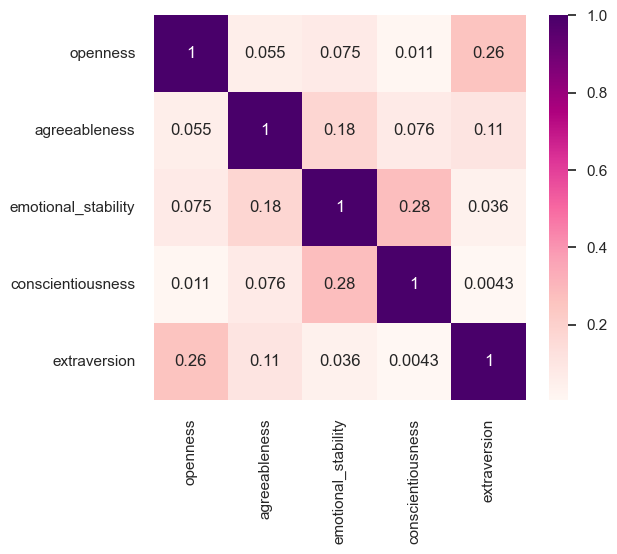

In [326]:
ocean = ['openness','agreeableness','emotional_stability','conscientiousness','extraversion']
cor_ocean = personality_data[ocean].corr()
plt.rcParams['figure.figsize']=(6,5)
sns.heatmap(cor_ocean,annot=True, cmap=plt.cm.RdPu)
plt.show()

Na osnovu matrice korelacije zaključuje se da u okviru OCEAN metrika ličnosti ne postoje značajne korelacije između vrednosti, što ima smisla obzirom da je ovo psihološki model ličnosti koji meri različite aspekte ličnosti.

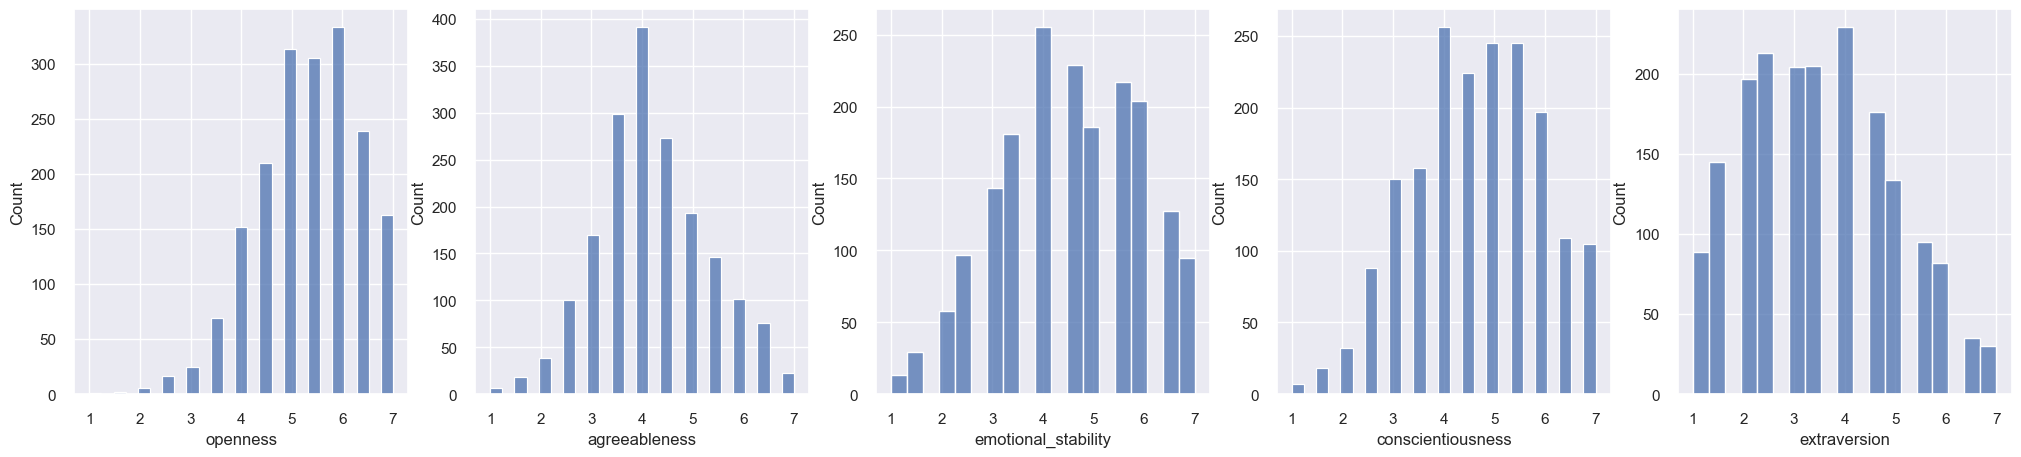

In [327]:
fig, axes = plt.subplots(1,5, figsize=(25,5))
sns.histplot(personality_data,x='openness',ax=axes[0])
sns.histplot(personality_data,x='agreeableness',ax=axes[1])
sns.histplot(personality_data,x='emotional_stability',ax=axes[2])
sns.histplot(personality_data,x='conscientiousness',ax=axes[3])
sns.histplot(personality_data,x='extraversion',ax=axes[4])
plt.show()

Na osnovu prethodnih histograma zaključuje se da raspodela podataka u okviru OCEAN atributa približno odgovara normalnoj raspodeli podataka, što je i očekivano.

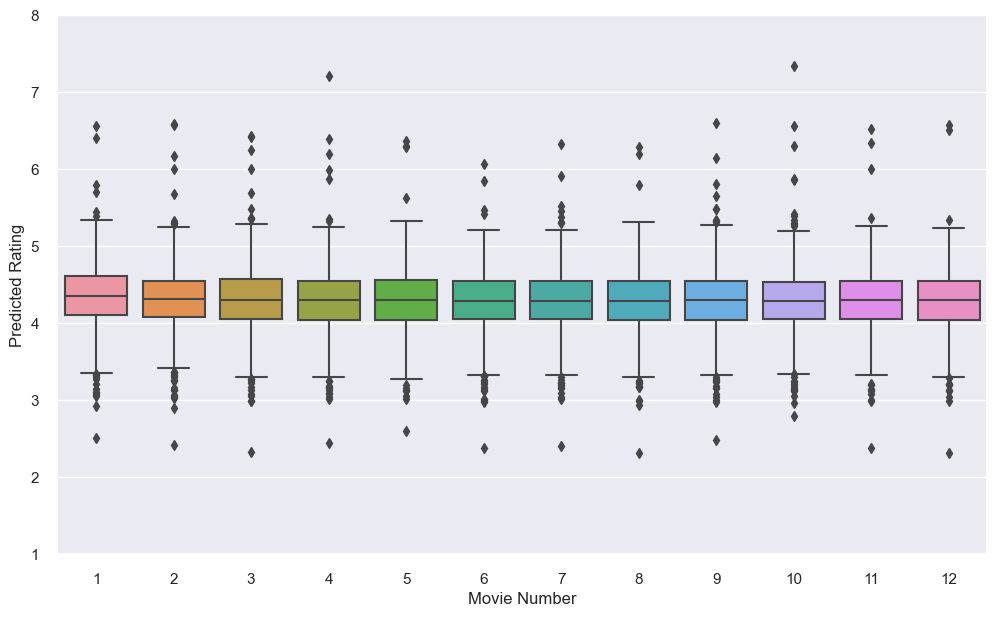

In [328]:
pred_ratings=[]
movies=[]
nums=[]
for x in range (1,13):
    pred_ratings.append(f"predicted_rating_{x}")
    movies.append(f"movie_{x}")
    nums.append(f"{x}")
plt.subplots(figsize=(12,7))
ax = sns.boxplot(data=personality_data[pred_ratings])
ax.set_xticklabels(nums)
ax.set_xlabel("Movie Number")
ax.set_ylabel("Predicted Rating")
ax.set(ylim=(1,8))
plt.show()

Prikazani su _boxplot_ grafici za predviđene ocene filmova. Može se zaključiti da su ove vrednosti pune _outlier_-a, tako da ih treba na neki način obraditi u preprocesiranju podataka.

In [329]:
print(personality_data['assigned metric'].value_counts())
print(personality_data['assigned condition'].value_counts())

 popularity     574
 serendipity    532
 diversity      520
 all            208
Name: assigned metric, dtype: int64
 high       554
 medium     538
 low        534
 default    208
Name: assigned condition, dtype: int64


Budući da su _assigned metric_ i _assigned condition_ kategoričke vrednosti, provereno je koje vrednosti se nalaze u _dataset_-u i koliko ih ima. Za _assigned metric_, pogodno je kodirati je u _one-hot_ formatu, dok _assigned condition_ poseduje određenu hijerarhiju tako da će biti kodiran u _label encoding_-u.

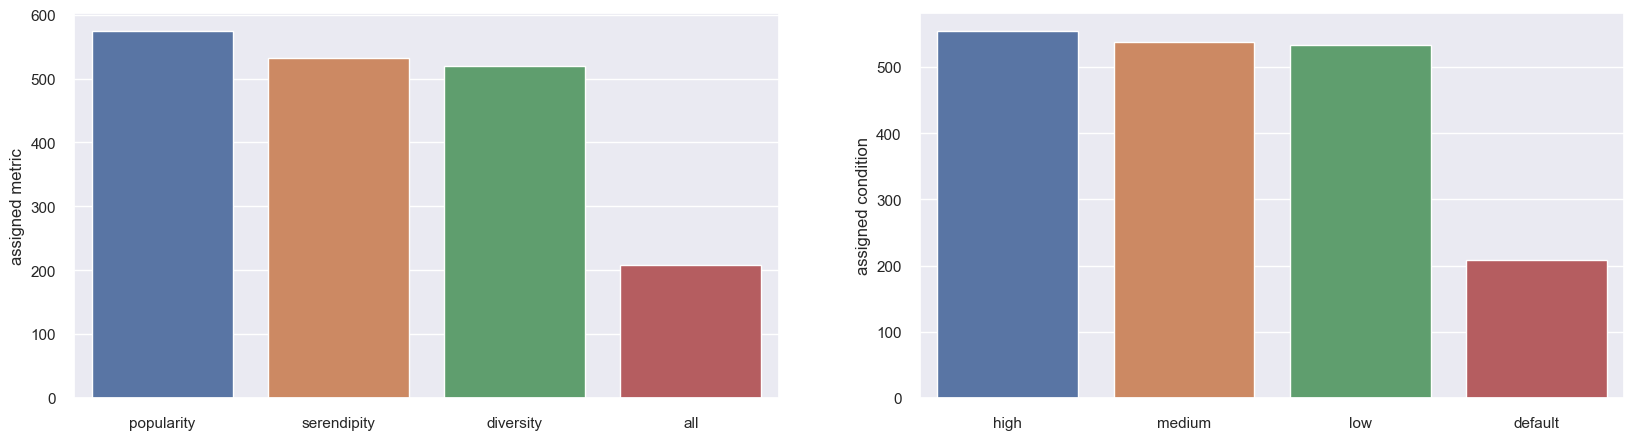

In [330]:
fig, axes = plt.subplots(1,2, figsize=(20,5))
sns.barplot(data=personality_data,x=['popularity','serendipity','diversity','all'],y=personality_data['assigned metric'].value_counts(),ax=axes[0])
sns.barplot(data=personality_data,x=['high','medium','low','default'],y=personality_data['assigned condition'].value_counts(),ax=axes[1])
plt.show()

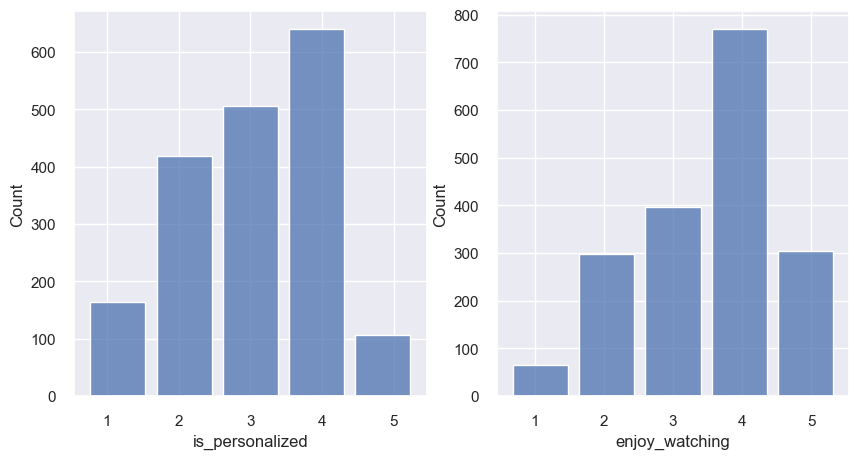

In [331]:
fig, axes = plt.subplots(1,2, figsize=(10,5))
sns.histplot(personality_data,x='is_personalized',ax=axes[0],shrink=2.5)
sns.histplot(personality_data,x='enjoy_watching',ax=axes[1],shrink=5)
plt.show()

In [332]:
len(personality_data.loc[personality_data['assigned metric'] == ' all'].loc[personality_data['assigned condition']==' default'])

208

Postoji 208 kontrolnih uzoraka kojima je svima zajedničko da imaju:
- _assigned metric = "all"_
- _assigned condition = "default"_

Treba razmotriti da li korišćenje ovih uzoraka doprinosi ili šteti klasterizaciji.

## <a id='toc1_3_'></a>[Preprocesiranje podataka](#toc0_)

### <a id='toc1_3_1_'></a>[Izbacivanje duplikata](#toc0_)

In [380]:
personality_data = personality_data.drop_duplicates()

### <a id='toc1_3_2_'></a>[Enkodiranje kategoričkih vrednosti](#toc0_)

In [334]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
transformed =  ohe.fit_transform(personality_data[['assigned metric']])
print(transformed.toarray())

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]


In [335]:
personality_data[ohe.categories_[0]] =transformed.toarray()
personality_data.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching,all,diversity,popularity,serendipity
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,high,77658,4.410466,...,127152,4.120456,95311,4.053847,4,4,0.0,0.0,0.0,1.0
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,default,94959,4.207280,...,969,4.174188,1232,4.334877,2,3,1.0,0.0,0.0,0.0
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,medium,110501,4.868064,...,1172,4.649281,1212,4.744990,2,2,0.0,0.0,0.0,1.0
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,medium,2905,4.526371,...,940,4.355061,905,4.317927,3,3,0.0,0.0,1.0,0.0
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,medium,2905,4.526371,...,940,4.355061,905,4.317927,2,3,0.0,0.0,1.0,0.0


In [336]:
from sklearn.preprocessing import OrdinalEncoder

scale_mapper = {
    ' low':0,
    ' medium':1,
    ' high':2,
    ' default':3
}

personality_data['assigned condition'] = personality_data['assigned condition'].replace(scale_mapper)
personality_data.head()

,userid,openness,agreeableness,emotional_stability,conscientiousness,extraversion,assigned metric,assigned condition,movie_1,predicted_rating_1,...,movie_11,predicted_rating_11,movie_12,predicted_rating_12,is_personalized,enjoy_watching,all,diversity,popularity,serendipity
0,8e7cebf9a234c064b75016249f2ac65e,5.0,2.0,3.0,2.5,6.5,serendipity,2,77658,4.410466,...,127152,4.120456,95311,4.053847,4,4,0.0,0.0,0.0,1.0
1,77c7d756a093150d4377720abeaeef76,7.0,4.0,6.0,5.5,4.0,all,3,94959,4.207280,...,969,4.174188,1232,4.334877,2,3,1.0,0.0,0.0,0.0
2,b7e8a92987a530cc368719a0e60e26a3,4.0,3.0,4.5,2.0,2.5,serendipity,1,110501,4.868064,...,1172,4.649281,1212,4.744990,2,2,0.0,0.0,0.0,1.0
3,92561f21446e017dd6b68b94b23ad5b7,5.5,5.5,4.0,4.5,4.0,popularity,1,2905,4.526371,...,940,4.355061,905,4.317927,3,3,0.0,0.0,1.0,0.0
4,030001ac2145a938b07e686a35a2d638,5.5,5.5,3.5,4.5,2.5,popularity,1,2905,4.526371,...,940,4.355061,905,4.317927,2,3,0.0,0.0,1.0,0.0


### <a id='toc1_3_3_'></a>[Izbacivanje nepotrebnih kolona](#toc0_)

In [337]:
colsToRemove = ["userid","assigned metric"] + movies+ pred_ratings
cols = [col for col in personality_data.columns if col not in colsToRemove]

Izbacuju se kolone sa ID-jem osoba i kolone vezane za filmove i njihove predviđene ocene. Kolona _assigned metric_ se izbacuje iz razloga što je enkodovana u _one-hot_ formatu koji je konkateniran na ceo _dataset_.

In [338]:
#indexDrop = personality_data[ (personality_data['assigned metric'] == ' all') ].index
#personality_data.drop(indexDrop,inplace=True)
#personality_data.head(15)

## <a id='toc1_4_'></a>[Klasterizacija](#toc0_)

Ideja je klasterizovati sve ispitane osobe u 4 klastera koji odgovaraju temperamentima koje ljudi mogu da imaju.

Isproban je _KMeans_ algoritam za klasterizaciju na minimalno preprocesiranim podacima (nisu skalirani). Iscrtani su 2D i 3D grafici klasterizacije i određen je _silhouette score_.

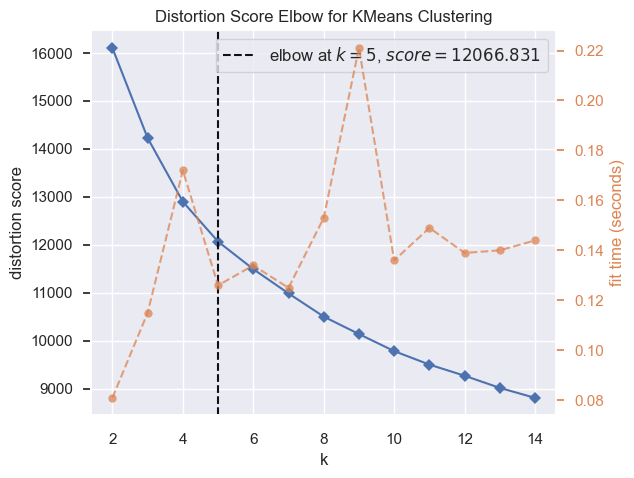

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [382]:
from sklearn import decomposition
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.preprocessing import MinMaxScaler


kmeans = KMeans(n_init=10,random_state=42)
visualizer = KElbowVisualizer(kmeans, k=(2,15))
visualizer.fit(personality_data[cols])
visualizer.poof()

In [383]:
k = 4

kmeans = KMeans(n_clusters=k,n_init=10)

kmeans.fit(personality_data[cols])

labels = kmeans.labels_

cluster_centers = kmeans.cluster_centers_

c:\Users\Nikola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



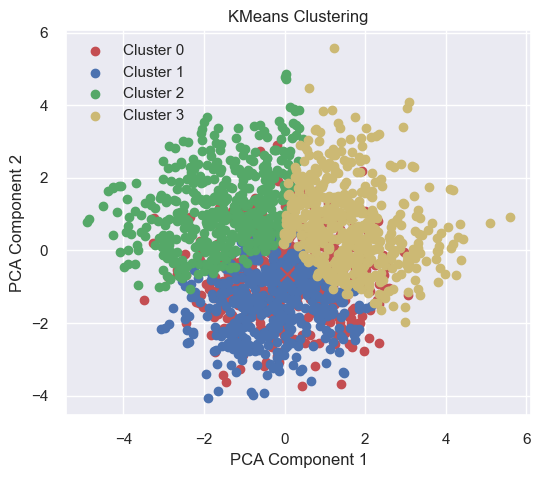

In [384]:
def generate2DGraph(data,cluster_centers,labels):
    pca = decomposition.PCA(n_components=2)
    data_pca = pca.fit_transform(data)
    cluster_centers_pca = pca.transform(cluster_centers)

    colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'w', 'purple', 'orange', 'gray', 'pink', 'brown', 'olive', 'cyan', 'magenta']
    for i in range(k):
        cluster = data_pca[labels == i]
        plt.scatter(cluster[:, 0], cluster[:, 1], c=colors[i], label='Cluster {}'.format(i))

    for i in range(k):
        plt.scatter(cluster_centers_pca[i, 0], cluster_centers_pca[i, 1], c=colors[i], marker='x', s=100)

    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.title('KMeans Clustering')

    plt.legend()

    plt.show()
generate2DGraph(personality_data[cols],cluster_centers,labels)

c:\Users\Nikola\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names



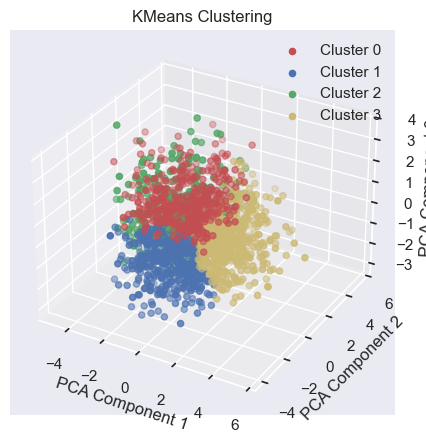

In [385]:
def generate3DGraph(data,cluster_centers,labels):
    pca = decomposition.PCA(n_components=3)
    data_pca = pca.fit_transform(data)
    cluster_centers_pca = pca.transform(cluster_centers)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['r', 'b', 'g', 'y', 'c', 'm', 'k', 'w', 'purple', 'orange', 'gray', 'pink', 'brown', 'olive', 'cyan', 'magenta']
    for i in range(k):
        cluster = data_pca[labels == i]
        ax.scatter(cluster[:, 0], cluster[:, 1], cluster[:, 2], c=colors[i], label='Cluster {}'.format(i))

    for i in range(k):
        ax.scatter(cluster_centers_pca[i, 0], cluster_centers_pca[i, 1], cluster_centers_pca[i, 2], c=colors[i], marker='x', s=100)

    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_zlabel('PCA Component 3')
    plt.title('KMeans Clustering')

    ax.legend()

    plt.show()

generate3DGraph(personality_data[cols],cluster_centers,labels)

In [386]:
import plotly.express as px

def generateInteractive3DGraph(data,labels):
    pca = decomposition.PCA(n_components=3)
    data_pca = pca.fit_transform(data)
    df = pd.DataFrame(data_pca, columns=['PC1','PC2','PC3'])
    #allData = personality_data.copy(deep=True)
    #allData['PC1'] = df.PC1
    #allData['PC2'] = df.PC2
    #allData['PC3'] = df.PC3
    #allData['cluster'] = labels
    df['cluster'] = labels
    fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
                color='cluster',title="KMeans Clustering")
    fig.show()
generateInteractive3DGraph(personality_data[cols],labels)

In [344]:
from sklearn.metrics import silhouette_score,calinski_harabasz_score, davies_bouldin_score


def printScore(data,labels):
    print("Silhouette score: ",silhouette_score(data,labels))
    print("Calinski-Harabas score: ",calinski_harabasz_score(data,labels))
    print("Davies-Bouldin score: ",davies_bouldin_score(data,labels))

printScore(personality_data[cols],labels)

Silhouette score:  0.1146373471291422
Calinski-Harabas score:  237.03346806734123
Davies-Bouldin score:  1.9652646492283155


In [387]:
def clusterValues(labels):
    data_sums = pd.DataFrame()
    data_sums['extroversion'] = personality_data['extraversion']
    data_sums['emotional_stability'] = personality_data['emotional_stability']
    data_sums['agreeable'] = personality_data['agreeableness']
    data_sums['conscientious'] = personality_data['conscientiousness']
    data_sums['open'] = personality_data['openness']
    data_sums['cluster'] = labels
    print(data_sums.groupby('cluster').mean())
clusterValues(labels=labels)

         extroversion  emotional_stability  agreeable  conscientious      open
cluster                                                                       
0            3.233254             4.663876   4.108852       4.924641  5.122010
1            2.355324             5.494213   4.409722       5.259259  5.106481
2            5.148268             5.119048   4.566017       4.902597  5.936147
3            3.126719             3.186640   3.819253       3.726916  5.293713


Bez skaliranja podataka, sa izbačenim kolonama za filmove dobija se _silhouette score_ od 0.1142, što nije najbolji rezultat.

U daljem radu biće isprobani _StandardScaler_, _MinMaxScaler_ i _RobustScaler_.

### <a id='toc1_4_1_'></a>[Skaliranje podataka](#toc0_)

#### <a id='toc1_4_1_1_'></a>[_StandardScaler_](#toc0_)

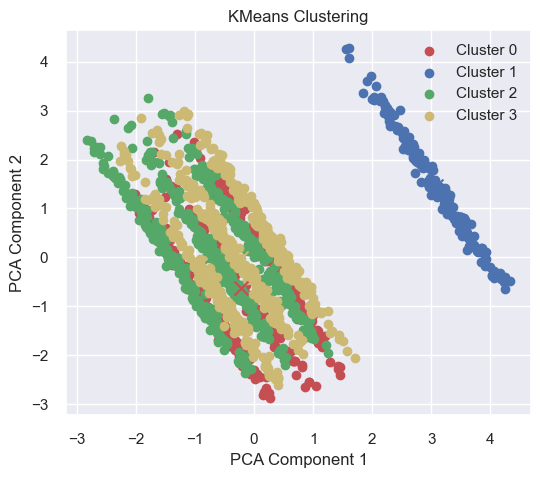

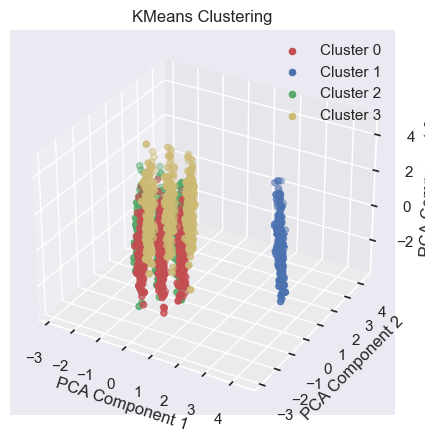

Silhouette score:  0.2489112919924218
Calinski-Harabas score:  356.69028560013044
Davies-Bouldin score:  1.6009917965066562
         extroversion  emotional_stability  agreeable  conscientious      open
cluster                                                                       
0            3.394231             4.625962   4.287500       4.775000  5.354808
1            3.531250             4.579327   4.228365       4.718750  5.463942
2            3.537456             4.532230   4.279617       4.581882  5.404181
3            3.500940             4.523496   4.072368       4.617481  5.333647


In [346]:
from sklearn.preprocessing import StandardScaler
k=4

scaler = StandardScaler()
data_scaled = scaler.fit_transform(personality_data[cols])

kmeansScaled = KMeans(n_clusters=k,n_init=10,random_state=42)

kmeansScaled.fit(data_scaled)

labels_scaled = kmeansScaled.labels_

cluster_centers_scaled = kmeansScaled.cluster_centers_


generate2DGraph(data_scaled,cluster_centers_scaled,labels_scaled)
generate3DGraph(data_scaled,cluster_centers_scaled,labels_scaled)
generateInteractive3DGraph(data_scaled,labels_scaled)

printScore(data_scaled,labels_scaled)
clusterValues(labels_scaled)

Primenom _StandardScaler_-a dobija se bolji _silhouette score_ (0.2489 u odnosu na 0.1146 sa neskaliranim podacima), bolji _Calinski-Harabas score_(356 u odnosu na 237) i manji _Davies-Bouldin score_ (1.6 u odnosu na 1.9)

#### <a id='toc1_4_1_2_'></a>[_MinMaxScaler_](#toc0_)

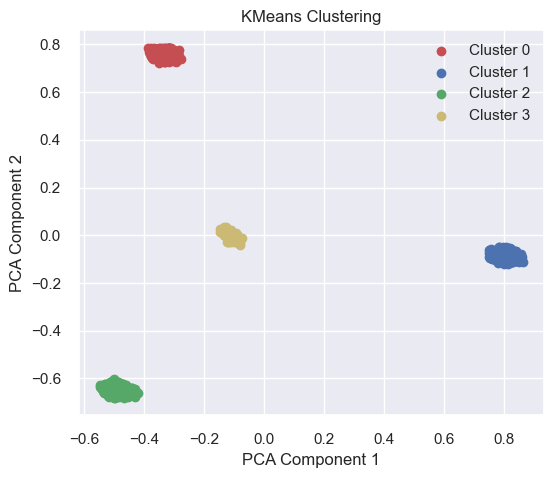

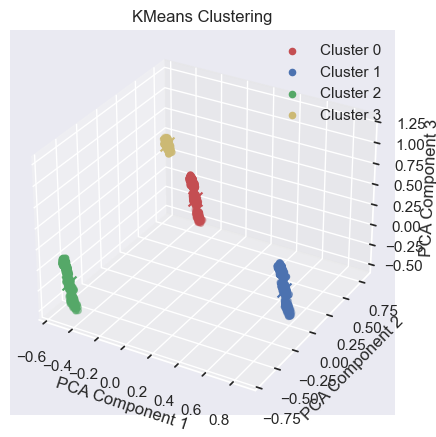

Silhouette score:  0.4708471928444634
Calinski-Harabas score:  1081.121036561833
Davies-Bouldin score:  0.8851908017676401
         extroversion  emotional_stability  agreeable  conscientious      open
cluster                                                                       
0            3.394231             4.625962   4.287500       4.775000  5.354808
1            3.537456             4.532230   4.279617       4.581882  5.404181
2            3.500940             4.523496   4.072368       4.617481  5.333647
3            3.531250             4.579327   4.228365       4.718750  5.463942


In [347]:
from sklearn.preprocessing import MinMaxScaler

k=4



minMax = MinMaxScaler(feature_range=(0,1))

data_min_max = minMax.fit_transform(personality_data[cols])

kmeansMinMax = KMeans(n_clusters=k,n_init=10,random_state=42)

kmeansMinMax.fit(data_min_max)

labels_min_max = kmeansMinMax.labels_

cluster_centers_min_max = kmeansMinMax.cluster_centers_


generate2DGraph(data_min_max,cluster_centers_min_max,labels_min_max)
generate3DGraph(data_min_max,cluster_centers_min_max,labels_min_max)
generateInteractive3DGraph(data_min_max,labels_min_max)

printScore(data_min_max,labels_min_max)
clusterValues(labels_min_max)

Primenom _MinMaxScaler_-a dobija se znatno bolji _silhouette score_ (0.4708), znatno veći _Calinski-Harabas score_ (1081), i znatno manji _Davies-Bouldin score_ (0.88).

#### <a id='toc1_4_1_3_'></a>[_RobustScaler_](#toc0_)

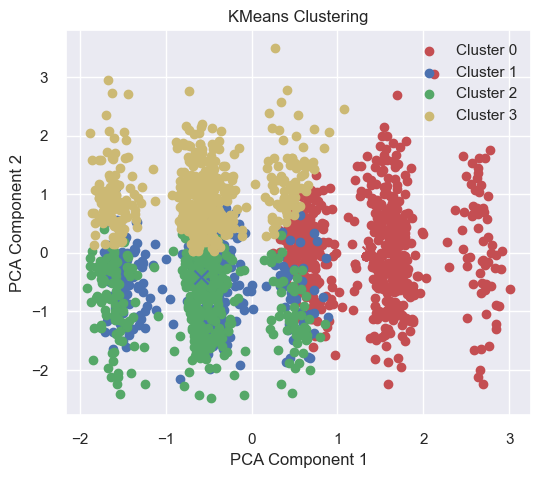

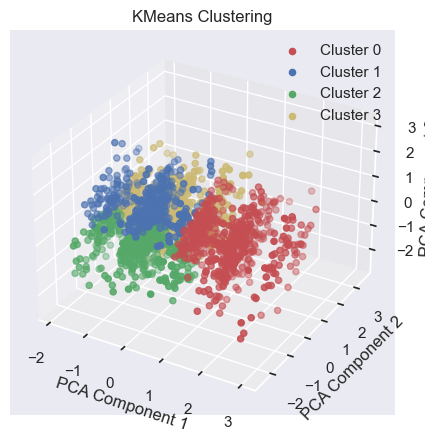

Silhouette score:  0.11223913227584183
Calinski-Harabas score:  250.42950790837125
Davies-Bouldin score:  2.1631652423446255
         extroversion  emotional_stability  agreeable  conscientious      open
cluster                                                                       
0            3.452715             4.573555   4.163748       4.796848  5.236427
1            2.366841             4.971279   3.975196       5.530026  4.909922
2            4.643041             5.289948   4.939433       5.295103  6.025773
3            3.481707             3.654472   3.893293       3.332317  5.390244


In [348]:
from sklearn.preprocessing import RobustScaler

robustScaler = RobustScaler()

data_robust = robustScaler.fit_transform(personality_data[cols])

kmeansRobust = KMeans(n_clusters=k,n_init=10)

kmeansRobust.fit(data_robust)

labels_robust = kmeansRobust.labels_

cluster_centers_robust = kmeansRobust.cluster_centers_


generate2DGraph(data_robust,cluster_centers_robust,labels_robust)
generate3DGraph(data_robust,cluster_centers_robust,labels_robust)
generateInteractive3DGraph(data_robust,labels_robust)


printScore(data_robust,labels_robust)
clusterValues(labels_robust)

Primenom _RobustScaler_-a dobija se najgori _silhouette score_ (0.1119, sa neskaliranim je bio 0.114), nesto veći _Calinski-Harabas score_ (250), i najveći _Davies-Bouldin score_ (2.16).

Na grafovima koji koriste skalirane podatke može se primetiti određeni patern grupisanja podatka. Klasteri se ne određuju po tipu ličnosti već po nekom drugom parametru. Vredi pogledati broj uzoraka u svakom klasteru.

In [349]:
df = personality_data.copy(deep=True)
df['cluster'] = labels_min_max
print(df['cluster'].value_counts())

1    574
2    532
0    520
3    208
Name: cluster, dtype: int64


In [350]:
df = personality_data.copy(deep=True)
df['cluster'] = labels_scaled
print(df['cluster'].value_counts())

2    574
3    532
0    520
1    208
Name: cluster, dtype: int64


Moze se videti da brojevi uzoraka u klasteru odgovaraju broju uzoraka po _assigned metric_ atributu. Ovo govori da taj atribut previše utiče na rezultat klasterizacije. Vredi probati klasterizaciju bez tog atributa.

In [351]:
for x in [' serendipity',
    ' popularity',
    ' diversity',
    ' all']:
    if x in cols:
        cols.remove(x)

In [352]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(personality_data[cols])

kmeansScaled = KMeans(n_clusters=k,n_init=10,random_state=42)

kmeansScaled.fit(data_scaled)

labels_scaled = kmeansScaled.labels_

cluster_centers_scaled = kmeansScaled.cluster_centers_

generateInteractive3DGraph(data_scaled,labels_scaled)

printScore(data_scaled,labels_scaled)
clusterValues(labels_scaled)

Silhouette score:  0.11372160625644197
Calinski-Harabas score:  237.88835032511338
Davies-Bouldin score:  2.066036463055484
         extroversion  emotional_stability  agreeable  conscientious      open
cluster                                                                       
0            4.481221             5.536385   4.843897       5.275822  6.043427
1            3.448104             4.610778   4.158683       4.815369  5.244511
2            3.648958             3.336458   3.712500       3.625000  5.615625
3            2.352459             4.908665   4.222482       5.037471  4.597190


Nakon uklanjanja _assigned metric_ atributa iregularnost klastera se smanjila, ali i dalje se moze uočiti. Pokušaćemo da uklonimo i _assigned condition_ atribut. 

In [355]:
if 'assigned condition' in cols:
    cols.remove('assigned condition')

In [356]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(personality_data[cols])

kmeansScaled = KMeans(n_clusters=k,n_init=10,random_state=42)

kmeansScaled.fit(data_scaled)

labels_scaled = kmeansScaled.labels_

cluster_centers_scaled = kmeansScaled.cluster_centers_

generateInteractive3DGraph(data_scaled,labels_scaled)

printScore(data_scaled,labels_scaled)
clusterValues(labels_scaled)

Silhouette score:  0.13313636606489038
Calinski-Harabas score:  287.4330709092589
Davies-Bouldin score:  1.8674436666651086
         extroversion  emotional_stability  agreeable  conscientious      open
cluster                                                                       
0            2.318182             5.007955   4.264773       5.073864  4.709091
1            4.647971             5.496420   4.816229       5.217184  6.028640
2            3.597895             3.290526   3.692632       3.625263  5.570526
3            3.432000             4.593000   4.167000       4.821000  5.233000


In [360]:
scaler = StandardScaler()
data_min = scaler.fit_transform(personality_data[cols])

pca = decomposition.PCA(n_components=3)
pcaData = pca.fit_transform(data_min)

kmeansScaled = KMeans(n_clusters=k,n_init=10,random_state=42)

kmeansScaled.fit(pcaData)

labels_scaled = kmeansScaled.labels_

cluster_centers_scaled = kmeansScaled.cluster_centers_

generateInteractive3DGraph(pcaData,labels_scaled)

printScore(pcaData,labels_scaled)
clusterValues(labels_scaled)

Silhouette score:  0.25104699138692665
Calinski-Harabas score:  660.6455920768526
Davies-Bouldin score:  1.1622380347906054
         extroversion  emotional_stability  agreeable  conscientious      open
cluster                                                                       
0            2.363229             4.906951   4.176009       5.076233  4.692825
1            4.541667             5.515476   4.872619       5.251190  6.067857
2            3.401590             4.596421   4.160040       4.821074  5.208748
3            3.698925             3.331183   3.721505       3.562366  5.589247


In [418]:
scaler = StandardScaler()
data_min = scaler.fit_transform(personality_data[ocean])

pca = decomposition.PCA(n_components=3)
pcaData = pca.fit_transform(data_min)

kmeansScaled = KMeans(n_clusters=k,n_init=10,random_state=42)

kmeansScaled.fit(pcaData)

labels_scaled = kmeansScaled.labels_

cluster_centers_scaled = kmeansScaled.cluster_centers_

generateInteractive3DGraph(pcaData,labels_scaled)

printScore(pcaData,labels_scaled)
clusterValues(labels_scaled)

Silhouette score:  0.23918663204468665
Calinski-Harabas score:  609.4320305072606
Davies-Bouldin score:  1.2296969550220616
         extroversion  emotional_stability  agreeable  conscientious      open
cluster                                                                       
0            4.290393             3.610262   3.896288       3.640830  5.919214
1            2.414784             3.956879   4.044148       4.208419  4.323409
2            4.072447             5.559382   5.536817       5.176960  5.701900
3            3.260440             5.250549   3.496703       5.705495  5.641758


#### Meanshift

In [110]:
from sklearn.cluster import MeanShift, estimate_bandwidth


bandwidth = estimate_bandwidth(personality_data[ocean], quantile=0.2, n_samples=100)

meanshift = MeanShift(n_jobs=-1,bandwidth=bandwidth, bin_seeding=True)

meanshift.fit(personality_data[ocean])

MSlabels = meanshift.labels_

MScluster_centers = meanshift.cluster_centers_



In [111]:
labels_unique = np.unique(MSlabels)
n_clusters_ = len(labels_unique)
n_clusters_

1

#### DBSCAN

In [113]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(n_jobs=-1)

dbscan.fit(personality_data[ocean])

DBSCAN_labels = meanshift.labels_

DBSCAN_cluster_centers = meanshift.cluster_centers_

In [114]:
labels_unique = np.unique(DBSCAN_labels)
n_clusters_ = len(labels_unique)
n_clusters_

1

In [414]:
from sklearn.cluster import AgglomerativeClustering

scaler = StandardScaler()
features_std = scaler.fit_transform(personality_data[ocean])

pca = decomposition.PCA(n_components=3)
pcaData = pca.fit_transform(features_std)

cluster = AgglomerativeClustering(n_clusters=4)

model = cluster.fit(pcaData)

AC_labels = cluster.labels_


In [415]:
clusterValues(AC_labels)
printScore(pcaData,AC_labels)

         extroversion  emotional_stability  agreeable  conscientious      open
cluster                                                                       
0            3.968560             5.673428   4.364097       5.741379  5.927992
1            2.697368             3.665789   3.515789       4.162281  4.855263
2            4.616049             4.020988   4.139506       3.864198  6.006173
3            2.763456             5.084986   5.223796       4.885269  4.706799
Silhouette score:  0.1807233752710169
Calinski-Harabas score:  469.9476021951802
Davies-Bouldin score:  1.436848527862971


In [416]:
from sklearn.cluster import SpectralClustering

cluster = SpectralClustering(n_clusters=4)

model = cluster.fit(pcaData)

SC_labels = cluster.labels_

In [417]:
clusterValues(SC_labels)
printScore(pcaData,SC_labels)

         extroversion  emotional_stability  agreeable  conscientious      open
cluster                                                                       
0            2.448211             4.011299   4.096045       4.265537  4.418079
1            3.370763             5.389831   3.604873       5.772246  5.682203
2            4.355308             3.880137   4.096747       3.854452  5.912671
3            3.865385             5.854701   6.012821       5.350427  5.568376
Silhouette score:  0.2314560274919127
Calinski-Harabas score:  557.444421846561
Davies-Bouldin score:  1.2345883114031728


#### <a id='toc1_4_1_4_'></a>[TODO pitati profesora sta da radimo sa pred ratings](#toc0_)
#### <a id='toc1_4_1_5_'></a>[TODO sta da radimo sa kontrolnim vrednostima (all, default)](#toc0_)